In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']


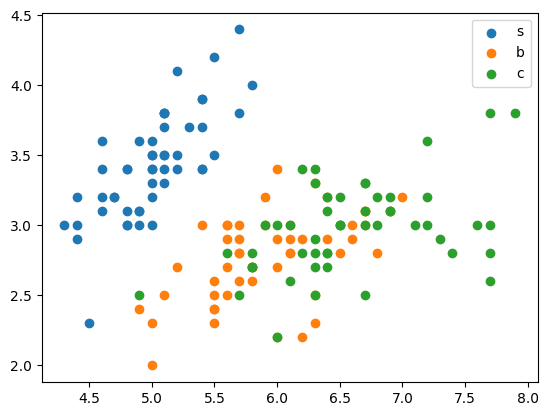

Accuracy: 1.0


In [2]:
import import_ipynb
import model  


In [3]:
df = load_wine()

In [4]:
print(df['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [5]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
#와인데이터셋의 클래스 0과 나머지를 구분하는 이진 퍼셉트론 모델 사용

In [7]:
df['data'][1,:]

array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
       2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
       1.05e+03])

In [8]:
len(df['data'])

178

In [9]:
print(df['target'])
len(df['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


178

In [34]:
df['data'].mean(axis=0)

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaled_X = MinMaxScaler().fit_transform(df['data'])

In [10]:
values, counts = np.unique(df['target'], return_counts=True)
for value, count in zip(values, counts):
    print(f"Class {value}: {count}")


Class 0: 59
Class 1: 71
Class 2: 48


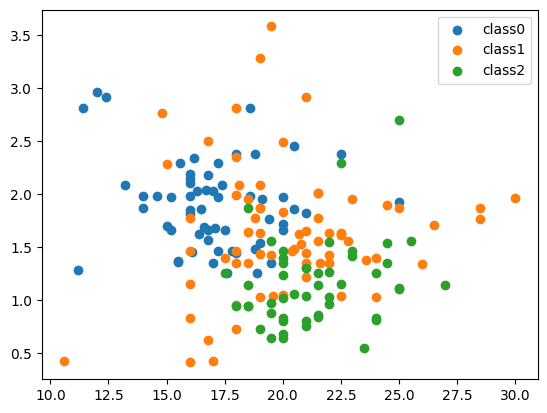

In [11]:
plt.scatter(df['data'][:59, 3],
            df['data'][:59, 8],
            label = 'class0')

plt.scatter(df['data'][59:130, 3],
            df['data'][59:130, 8],
            label = 'class1')

plt.scatter(df['data'][130:178, 3],
            df['data'][130:178, 8],
            label = 'class2')

plt.legend()
plt.show()

In [36]:
x = df['data'][:]
y = df['target'][:]
#y = list(map(lambda v : -1 if v == 0 else 1, y))
y = np.where(y == 0, -1, 1)
eta, n_iter = 0.01, 100

# result_w, result_errors = model.fit(x, y, eta, n_iter)
result_w, result_errors = model.fit(scaled_X, y, eta, n_iter)

In [25]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [14]:
model.fit(x, y, eta, n_iter)

(array([  7.8  ,  62.72 ,  -5.114,  -0.616,  16.8  ,  32.8  ,  -4.22 ,
        -43.082,   5.636, -30.064, -48.018,   8.918, -24.366, 124.   ]),
 array([1., 2., 2., 3., 2., 3., 2., 2., 3., 2., 3., 2., 2., 3., 2., 2., 3.,
        2., 3., 2., 2., 3., 2., 3., 2., 2., 3., 2., 2., 3., 2., 3., 2., 2.,
        3., 2., 2., 3., 2., 3., 2., 2., 3., 2., 3., 2., 2., 3., 2., 2., 3.,
        2., 3., 2., 2., 3., 2., 3., 2., 2., 3., 2., 2., 3., 2., 3., 2., 2.,
        3., 2., 2., 3., 2., 3., 2., 2., 3., 2., 3., 2., 2., 3., 2., 2., 3.,
        2., 3., 2., 2., 3., 2., 3., 2., 2., 3., 2., 2., 3., 2., 3.]))

In [37]:
result_w, result_errors

(array([ 0.12      , -0.06905263, -0.03735178, -0.08791444,  0.11505155,
        -0.04065217,  0.01144828, -0.03278481,  0.02075472,  0.01520505,
        -0.0031058 ,  0.09528455, -0.08263736, -0.13426534]),
 array([1., 3., 2., 3., 4., 2., 3., 4., 2., 2., 2., 2., 2., 3., 2., 2., 2.,
        2., 3., 4., 2., 2., 2., 2., 2., 2., 2., 2., 3., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [27]:
xt = df['data'][:]
yt = df['target'][:]
yt = np.where(yt == 0, -1, 1)

In [28]:
yt

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [38]:
sum_of_error = 0
for vx, t in zip(scaled_X, yt):
    predicted_value = model.predict(vx, result_w)
    print(predicted_value)
    sum_of_error += (predicted_value != t)
print("Accuracy: {0}".format(1 - sum_of_error / len(yt)))

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
Accuracy: 1.0
